In [1]:
from common import Fonts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

In [2]:
df = pd.read_csv("2022_schedule.csv")
df

,date,time,home,away
0,2022-04-29,19:30:00,LA,NC
1,2022-04-30,15:00:00,POR,KC
2,2022-04-30,19:00:00,CHI,LOU
3,2022-05-01,17:00:00,WAS,RGN
4,2022-05-01,18:00:00,HOU,SD
...,...,...,...,...
132,2022-10-16,16:00:00,HOU,KC
133,2022-10-16,19:00:00,SD,CHI
134,2022-10-23,14:00:00,POR,SD
135,2022-10-23,16:30:00,RGN,KC


In [3]:
teams = df.home.unique()

In [4]:
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")

In [5]:
results = {}
for team in teams:
    games = df[(df["home"] == team) | (df["away"] == team)]
    gaps = list(
        map(
            lambda x: min(x, 7),
            sorted([x.days for x in games.date.diff().tolist()[1:]]),
        )
    )

    count = []
    for i in range(3, 8):
        count.append(gaps.count(i))
    results[team] = count

In [6]:
results = OrderedDict(sorted(results.items(), key=lambda i: i[1][0]))

In [7]:
teams = {
    "NJY": "NJ/NY Gotham",
    "POR": "Portland Thorns",
    "LA": "Angel City",
    "CHI": "Chicago Red Stars",
    "WAS": "Washington Spirit",
    "SD": "San Diego Wave",
    "NC": "NC Courage",
    "RGN": "OL Reign",
    "LOU": "Racing Louisville",
    "HOU": "Houston Dash",
    "ORL": "Orlando Pride",
    "KC": "KC Current",
}

In [8]:
labels = list([teams[i] for i in results.keys()])
data = np.array(list(results.values()))
data_cum = data.cumsum(axis=1)
category_colors = plt.get_cmap("Spectral")(np.linspace(0.15, 0.85, data.shape[1]))

<Figure size 1728x972 with 0 Axes>

<Figure size 28800x16200 with 0 Axes>

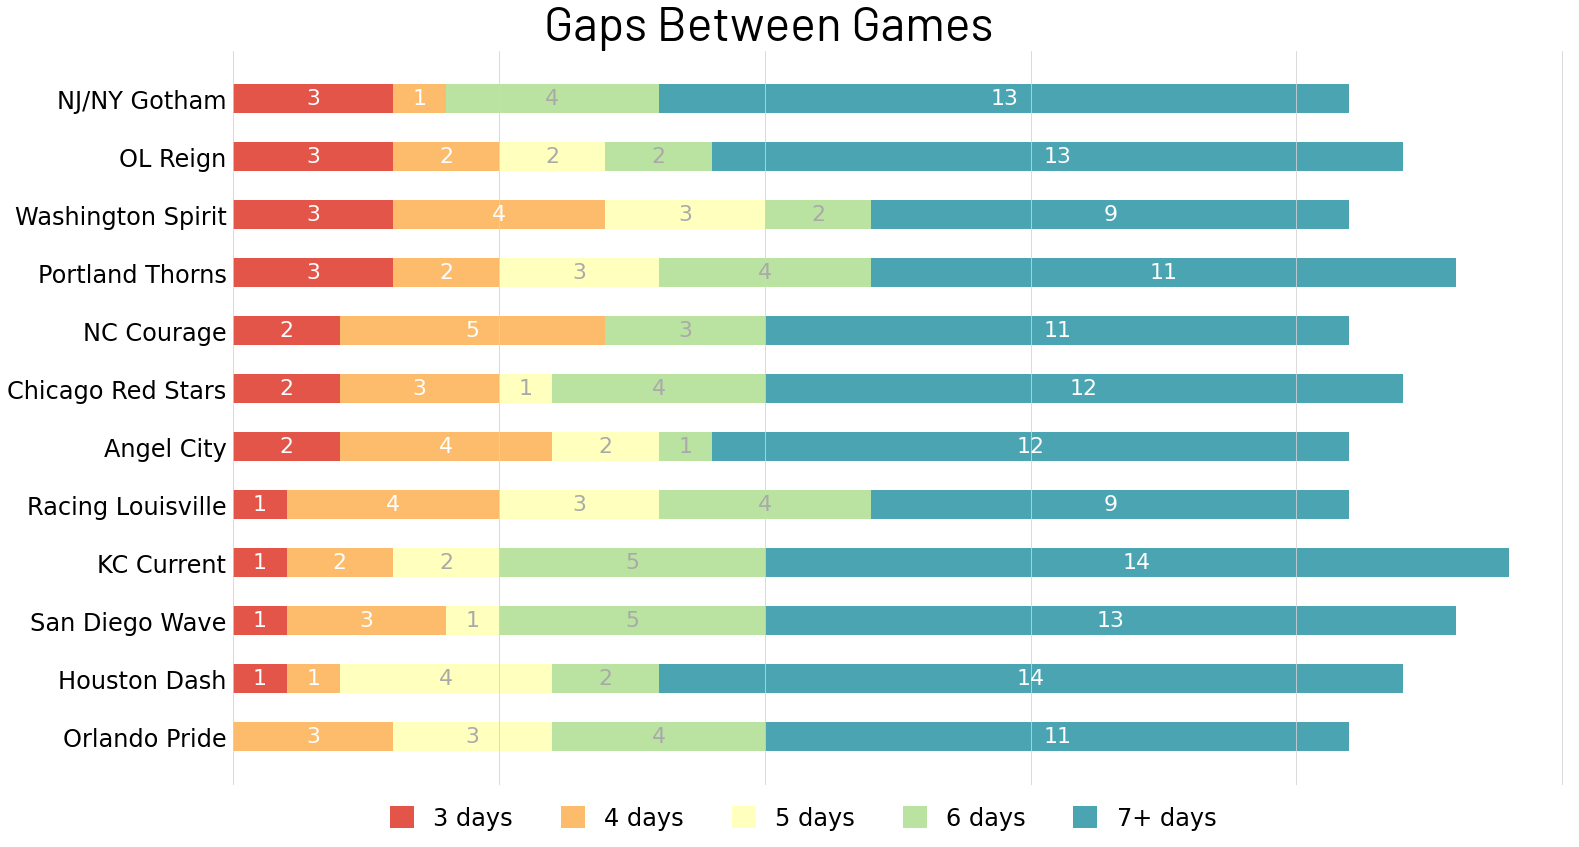

In [10]:
plt.clf()
plt.rcParams["figure.figsize"] = (24, 13.5)
plt.figure(dpi=1200)
fig, ax = plt.subplots()

# Title
plt.title("Gaps Between Games", fontproperties=Fonts.BARLOW, size=48, x=0.4)

for i, (colname, color) in enumerate(zip(range(0, 5), category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    rects = ax.barh(labels, widths, left=starts, height=0.5, label=colname, color=color)

    xcenters = starts + widths / 2

    r, g, b, _ = color
    text_color = "white" if r * g * b < 0.4 else "darkgrey"
    for y, (x, c) in enumerate(zip(xcenters, widths)):
        if c > 0:
            ax.text(
                x, y, str(int(c)), ha="center", va="center", color=text_color, size=22
            )

# General
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# Axes
ax.tick_params(bottom=False, left=False, labelbottom=False)
ax.xaxis.grid(True, color="lightgray")
ax.tick_params(axis="y", which="major", labelsize=24)
plt.xticks([0, 5, 10, 15, 20, 25])

# Legend
ax.legend(
    ["3 days", "4 days", "5 days", "6 days", "7+ days"],
    ncol=5,
    bbox_to_anchor=(0.75, 0),
    fontsize=24,
    handlelength=1,
    handleheight=1,
    frameon=False,
)

# Save image
plt.savefig("2022_gaps.png", bbox_inches="tight", pad_inches=0.5)